# Project: Predicting Credit Card Approvals

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#dp">Data Processing for Models</a></li>
<li><a href="#ml">Machine Learning Models</a></li>
<li><a href="#gs">Grid searching and making the model perform better</a></li>
<li><a href="#best_p">Finding the best performing model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

<p>Commercial banks receive <em>a lot</em> of applications for credit cards. Many of them get rejected for many reasons, like
     - High loan balances.
     - Low income levels.
     - Too many inquiries on an individual's credit report.
for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). 
</p>
<p><img src="https://assets.datacamp.com/production/project_558/img/credit_card.jpg" alt="Credit card being held in hand"></p>
<p>We'll use the <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository. The structure of this notebook is as follows:</p>

### Questions
> Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.

In [1]:
# Importing Necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning Packages
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

<a id='wrangling'></a>
## Data Wrangling

### Import the data file

In [2]:
df = pd.read_csv(r'cc_approvals.data',header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


#### You can find columns definition <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">here</a>

In [3]:
columns = ['gender', 'age', 'debt', 'married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault',
          'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved']
df.columns = columns

In [4]:
df.shape

(690, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          690 non-null    object 
 1   age             690 non-null    object 
 2   debt            690 non-null    float64
 3   married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [6]:
df.describe()

,debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [7]:
df.tail(20)

,gender,age,debt,married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-



### Data Cleaning
> Converting the **?** Missing values with **NaN**

> Handling the Missing Values part I

> Handling the Missing Values part II

> Converting age from string to float


#### Converting the **?** Missing values with **NaN**

In [8]:
df = df.replace("?",np.NaN)
df.tail(20)

,gender,age,debt,married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


In [9]:
df.isnull().sum()

gender            12
age               12
debt               0
married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

#### Handling the missing values I

In [10]:
df.fillna(df.mean(), inplace=True)

In [11]:
df.isnull().sum()

gender            12
age               12
debt               0
married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

#### Handling the Missing values II

In [12]:
# Iterate over each column of df
for col in df.columns:
    
    # Check if the column is of object type
    if df[col].dtypes == 'object':
        
        # Impute with the most frequent value
        df[col] = df[col].fillna(df[col].value_counts().index[0])

In [13]:
print(df.isnull().values.sum())

0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          690 non-null    object 
 1   age             690 non-null    object 
 2   debt            690 non-null    float64
 3   married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


#### Convert age from String to float

In [15]:
df['age'] = df['age'].astype('float')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          690 non-null    object 
 1   age             690 non-null    float64
 2   debt            690 non-null    float64
 3   married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.4+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Showing the data distribution

#### Showing the distribution of the gender

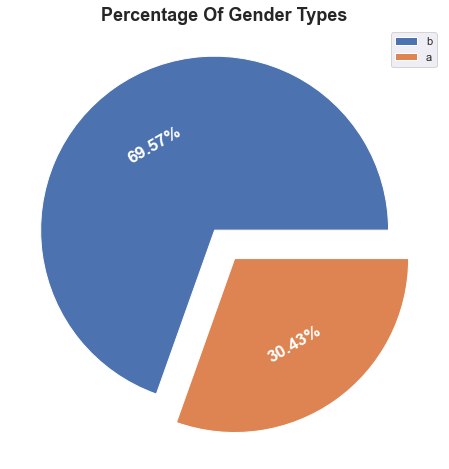

In [17]:
sns.set_theme(style="darkgrid")

plt.figure(figsize = (10, 8))
plt.pie(pd.value_counts(df['gender']), 
        labels = df['gender'].value_counts().keys(),
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold', 
                     'rotation' : '30',
                     'color' : 'w'},explode = (0.1, 0.1))


plt.legend()
plt.title('Percentage Of Gender Types', fontsize = 18, fontweight = 'bold')
plt.show()

We can know from the graph that the **gender type** dosen't affect the distribution.

#### Showing the distribution of the customers' ages

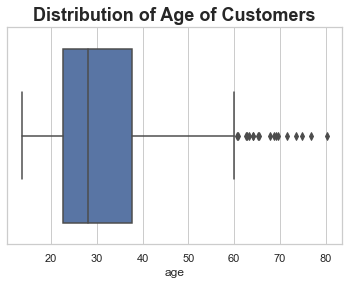

In [18]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["age"])
plt.title('Distribution of Age of Customers', fontsize = 18, fontweight = 'bold')
plt.show()

The distribution is closed to be normally distrubtion excpet for the outliers.

#### Showing the distribution of the dept customers 

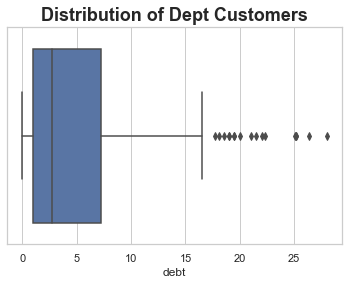

In [19]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["debt"])
plt.title('Distribution of Dept Customers', fontsize = 18, fontweight = 'bold')
plt.show()

The Same as the **age** column in the **dept** column

#### Showing the Education Level of the customers

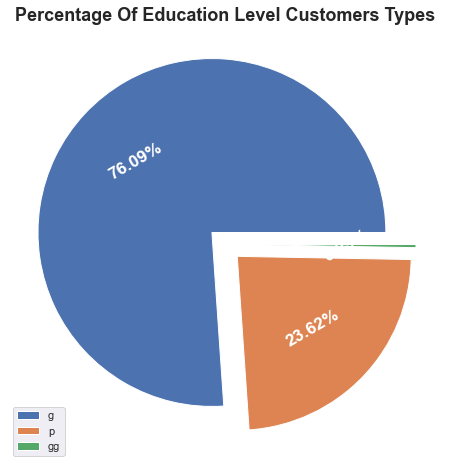

In [20]:
sns.set_theme(style="darkgrid")

plt.figure(figsize = (10, 8))
plt.pie(pd.value_counts(df['BankCustomer']), 
        labels = df['BankCustomer'].value_counts().keys(),
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold', 
                     'rotation' : '30',
                     'color' : 'w'}, explode = (0.1, 0.1, 0.1))

plt.legend()
plt.title('Percentage Of Education Level Customers Types', fontsize = 18, fontweight = 'bold')
plt.show()

#### Showing the distribution of the Employed Customers

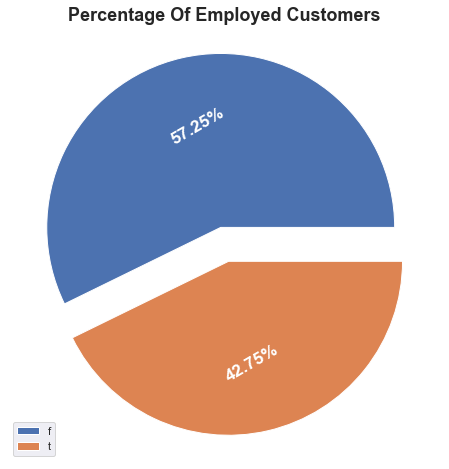

In [21]:
sns.set_theme(style="darkgrid")

plt.figure(figsize = (10, 8))
plt.pie(pd.value_counts(df['Employed']), 
        labels = df['Employed'].value_counts().keys(),
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold', 
                     'rotation' : '30',
                     'color' : 'w'}, explode = (0.1, 0.1))

plt.legend()
plt.title('Percentage Of Employed Customers', fontsize = 18, fontweight = 'bold')
plt.show()

#### Showing the distribution of Years of Employed

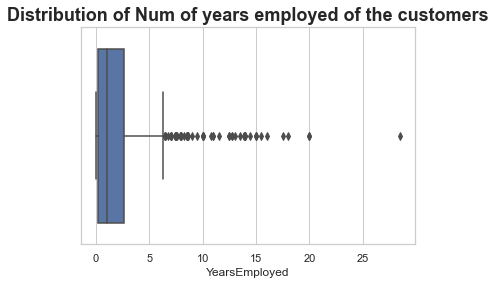

In [22]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["YearsEmployed"])
plt.title('Distribution of Num of years employed of the customers', fontsize = 18, fontweight = 'bold')
plt.show()

#### Showing the distribution of the Income

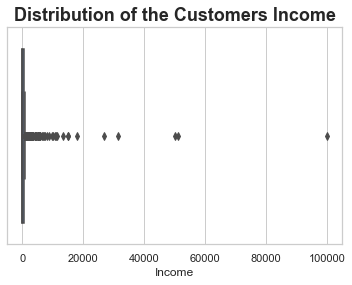

In [23]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["Income"])
plt.title('Distribution of the Customers Income', fontsize = 18, fontweight = 'bold')
plt.show()

The Graph showing that there is a varity of income to the customers and it's not normally distrbuted 

<a id='dp'></a>
## Data pre-processing

#### Using of LabelEncoder to handel the object columns 

In [24]:
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df.columns:
    # Compare if the dtype is object
    if df[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col])

In [25]:
df = df.drop([df.columns[11],df.columns[13]], axis=1)
df = df.values

# Segregate features and labels into separate variables
X,y = df[:,0:13], df[:,13]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

### Data Normalization 

> With MinMaxScaler

>With StanderdScaler

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<a id='ml'></a>
## Machine Learning Part

### Logistic Regression

In [27]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred = logreg.predict(X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", f1_score(y_pred, y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test, y_pred)

Accuracy of logistic regression classifier:  0.8448275862068965


array([[94,  9],
       [27, 98]], dtype=int64)

### Random Forest

In [29]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [30]:
y_pred = rf_clf.predict(X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of Random Forest classifier: ", f1_score(y_pred, y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test, y_pred)

Accuracy of Random Forest classifier:  0.8724279835390946


array([[ 91,  12],
       [ 19, 106]], dtype=int64)

<a id='gs'></a>
## Grid searching and making the model perform better

In [31]:
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

param_grid = dict(tol=tol, max_iter=max_iter)

<a id='best_p'></a>
## Finding the best performing model

In [32]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

grid_model_result = grid_model.fit(rescaledX, y)


# Summarize results
best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.850725 using {'max_iter': 100, 'tol': 0.01}


<a id='conclusions'></a>
## Conclusions

> Using of Data Analysis, Data Science, Machine Learning and Deep Learning Techniques to estimate the Credit Card Approvals.